CRIME DATASET

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
from random import randint

READ DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
Data = pd.read_csv('drive/MyDrive/ML2022/sensor_readings_24.csv')
D=Data.to_numpy()
dim=np.shape(D)
print(dim)
DF=np.copy(D)

(5456, 25)


In [53]:
DF = np.where(DF == 'Move-Forward' , 0, DF)
DF = np.where(DF == 'Sharp-Right-Turn', 1, DF)
DF = np.where(DF == 'Slight-Left-Turn' , 2, DF)
DF = np.where(DF == 'Slight-Right-Turn', 3, DF)

EDA

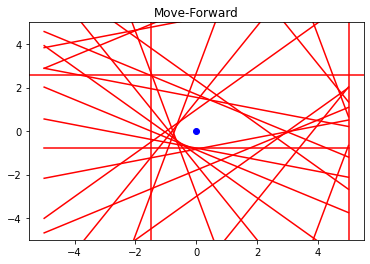

In [54]:
xp=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ang=np.array([270,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90 , 105, 120, 135, 150, 165, 180 , 195, 210 , 225, 240, 255])
m=np.copy(ang)
m=m.astype('float')
q=np.copy(ang)
q=q.astype('float')
ang=ang*math.pi/180
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  i=randint(0, np.shape(DF)[0])
  if DF[i,24] == 0:
    found=1
    for j in range(len(ang)):
      if ang[j]==0.0:
        plt.axvline(x=DF[i,j],color='r')
      elif ang[j]==(-math.pi): 
        plt.axvline(x=-DF[i,j],color='r')
      elif ang[j]==(math.pi/2):
        plt.axhline(y=DF[i,j], color='r')
      elif  ang[j]==(-math.pi/2):
        plt.axhline(y=-DF[i,j], color='r')
      else :
        m[j]=-1/math.tan(ang[j])
        q[j]=math.sin(ang[j])*DF[i,j]-m[j]*math.cos(ang[j])*DF[i,j]
        plt.plot(xp,xp*m[j]+q[j],'r')
    plt.plot(0,0,'bo')
    plt.ylim(-5,5)
    ax.set_title('Move-Forward')

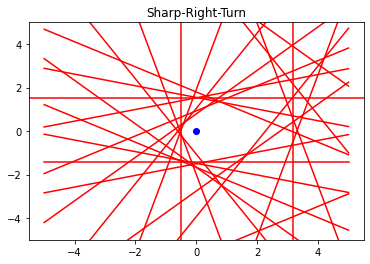

In [55]:
xp=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ang=np.array([270,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90 , 105, 120, 135, 150, 165, 180 , 195, 210 , 225, 240, 255])
m=np.copy(ang)
m=m.astype('float')
q=np.copy(ang)
q=q.astype('float')
ang=ang*math.pi/180
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  i=randint(0, np.shape(DF)[0])
  if DF[i,24] == 1:
    found=1
    for j in range(len(ang)):
      if ang[j]==0.0:
        plt.axvline(x=DF[i,j],color='r')
      elif ang[j]==(-math.pi): 
        plt.axvline(x=-DF[i,j],color='r')
      elif ang[j]==(math.pi/2):
        plt.axhline(y=DF[i,j], color='r')
      elif  ang[j]==(-math.pi/2):
        plt.axhline(y=-DF[i,j], color='r')
      else :
        m[j]=-1/math.tan(ang[j])
        q[j]=math.sin(ang[j])*DF[i,j]-m[j]*math.cos(ang[j])*DF[i,j]
        plt.plot(xp,xp*m[j]+q[j],'r')
    plt.plot(0,0,'bo')
    plt.ylim(-5,5)
    ax.set_title('Sharp-Right-Turn')

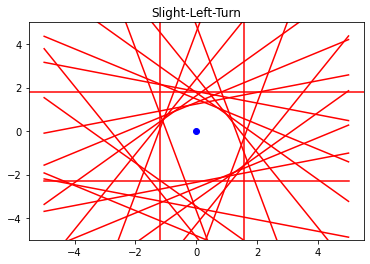

In [56]:
xp=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ang=np.array([270,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90 , 105, 120, 135, 150, 165, 180 , 195, 210 , 225, 240, 255])
m=np.copy(ang)
m=m.astype('float')
q=np.copy(ang)
q=q.astype('float')
ang=ang*math.pi/180
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  i=randint(0, np.shape(DF)[0])
  if DF[i,24] == 2:
    found=1
    for j in range(len(ang)):
      if ang[j]==0.0:
        plt.axvline(x=DF[i,j],color='r')
      elif ang[j]==(-math.pi): 
        plt.axvline(x=-DF[i,j],color='r')
      elif ang[j]==(math.pi/2):
        plt.axhline(y=DF[i,j], color='r')
      elif  ang[j]==(-math.pi/2):
        plt.axhline(y=-DF[i,j], color='r')
      else :
        m[j]=-1/math.tan(ang[j])
        q[j]=math.sin(ang[j])*DF[i,j]-m[j]*math.cos(ang[j])*DF[i,j]
        plt.plot(xp,xp*m[j]+q[j],'r')
    plt.plot(0,0,'bo')
    plt.ylim(-5,5)
    ax.set_title('Slight-Left-Turn')

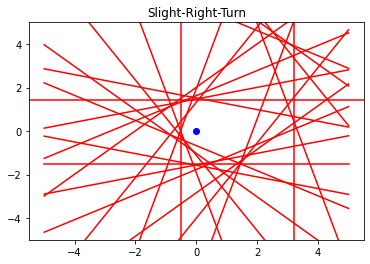

In [59]:
xp=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ang=np.array([270,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90 , 105, 120, 135, 150, 165, 180 , 195, 210 , 225, 240, 255])
m=np.copy(ang)
m=m.astype('float')
q=np.copy(ang)
q=q.astype('float')
ang=ang*math.pi/180
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  i=randint(0, np.shape(DF)[0])
  if DF[i,24] == 3:
    found=1
    for j in range(len(ang)):
      if ang[j]==0.0:
        plt.axvline(x=DF[i,j],color='r')
      elif ang[j]==(-math.pi): 
        plt.axvline(x=-DF[i,j],color='r')
      elif ang[j]==(math.pi/2):
        plt.axhline(y=DF[i,j], color='r')
      elif  ang[j]==(-math.pi/2):
        plt.axhline(y=-DF[i,j], color='r')
      else :
        m[j]=-1/math.tan(ang[j])
        q[j]=math.sin(ang[j])*DF[i,j]-m[j]*math.cos(ang[j])*DF[i,j]
        plt.plot(xp,xp*m[j]+q[j],'r')
    plt.plot(0,0,'bo')
    plt.ylim(-5,5)
    ax.set_title('Slight-Right-Turn')

In [34]:
dim=np.shape(DF)
print(dim)
il=round(0.40*dim[0])
i=np.random.permutation(dim[0])
X=DF[i[0:il],0:dim[1]-1]
Y=DF[i[0:il],dim[1]-1]
Y=Y.astype('int')
print(Y[0:10])
print(X[0:10,:])
XT=DF[i[il+1:dim[0]],0:dim[1]-1]
YT=DF[i[il+1:dim[0]],dim[1]-1]
YT=YT.astype('int')


(5456, 25)
[0 1 1 0 1 1 3 3 1 3]
[[2.508 2.527 2.001 2.06 1.722 1.326 1.317 1.326 1.462 1.663 1.673 0.92
  0.908 0.921 5.0 5.0 0.976 0.992 0.8 2.382 4.316 4.771 3.574 2.519]
 [0.577 5.0 5.0 1.371 1.383 5.0 4.234 1.454 5.0 2.977 2.416 1.671 1.434
  5.0 0.766 0.746 0.749 0.777 0.799 0.567 0.55 0.527 0.531 0.625]
 [1.603 2.413 2.626 2.695 5.0 2.137 3.25 3.254 2.793 2.791 2.814 0.873
  4.602 0.793 0.776 0.782 0.813 0.878 0.836 0.749 0.867 0.872 0.933 5.0]
 [2.053 2.312 5.0 2.007 2.021 2.123 2.109 1.512 1.493 1.483 1.495 1.51
  1.549 5.0 1.433 1.405 1.417 2.721 2.303 0.833 1.678 2.214 2.224 2.097]
 [0.962 2.443 2.653 2.641 2.66 3.261 3.242 3.233 2.778 2.758 2.771 1.766
  3.842 0.925 0.784 0.762 0.77 0.389 0.884 0.887 0.894 0.901 0.912 5.0]
 [0.809 2.046 2.727 2.896 5.0 4.059 1.569 1.547 1.517 1.513 1.536 0.872
  1.809 0.794 0.774 0.775 0.796 0.814 0.793 0.76 0.744 0.745 0.766 5.0]
 [1.115 1.807 1.841 3.253 4.248 5.0 5.0 1.89 2.568 2.56 1.731 1.719 1.706
  1.716 1.739 0.759 1.879 0.489 0.483

NORMALIZE DATA

In [18]:
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)
XT = scalerX.transform(XT)

MODEL SELECTION (HYPERPARAMETER TUNING)

In [ ]:
grid = {'C':        np.logspace(-6,4,10),
        'kernel':   ['rbf'],
        'gamma':    np.logspace(-6,4,10)}
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)

TRAIN MODEL

In [ ]:
M = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'],
        gamma = H.best_params_['gamma'])
M.fit(X,Y)

SVC(C=59.94842503189421, gamma=0.3593813663804626)

TEST SET

In [24]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[   0,    0, 1302,    0],
       [   0,    0, 1256,    0],
       [   0,    0,  204,    0],
       [   0,    0,  511,    0]])

TREE

In [35]:
maxDepth=5
grid = {'min_samples_leaf': [8,16,32,64,96,128]}
MS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)
M = DecisionTreeClassifier(min_samples_leaf=H.best_params_['min_samples_leaf'],
                           max_depth=maxDepth)
M.fit(X,Y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8)

In [36]:
text_representation = tree.export_text(M)
print(text_representation)

|--- feature_14 <= 0.90
|   |--- class: 1
|--- feature_14 >  0.90
|   |--- feature_18 <= 0.50
|   |   |--- feature_11 <= 1.17
|   |   |   |--- class: 1
|   |   |--- feature_11 >  1.17
|   |   |   |--- feature_13 <= 1.32
|   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  1.32
|   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |--- class: 3
|   |--- feature_18 >  0.50
|   |   |--- feature_11 <= 0.90
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.90
|   |   |   |--- feature_17 <= 0.90
|   |   |   |   |--- feature_19 <= 0.49
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_19 >  0.49
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_17 >  0.90
|   |   |   |   |--- feature_19 <= 0.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_19 >  0.90
|   |   |   |   |   |--- class: 2



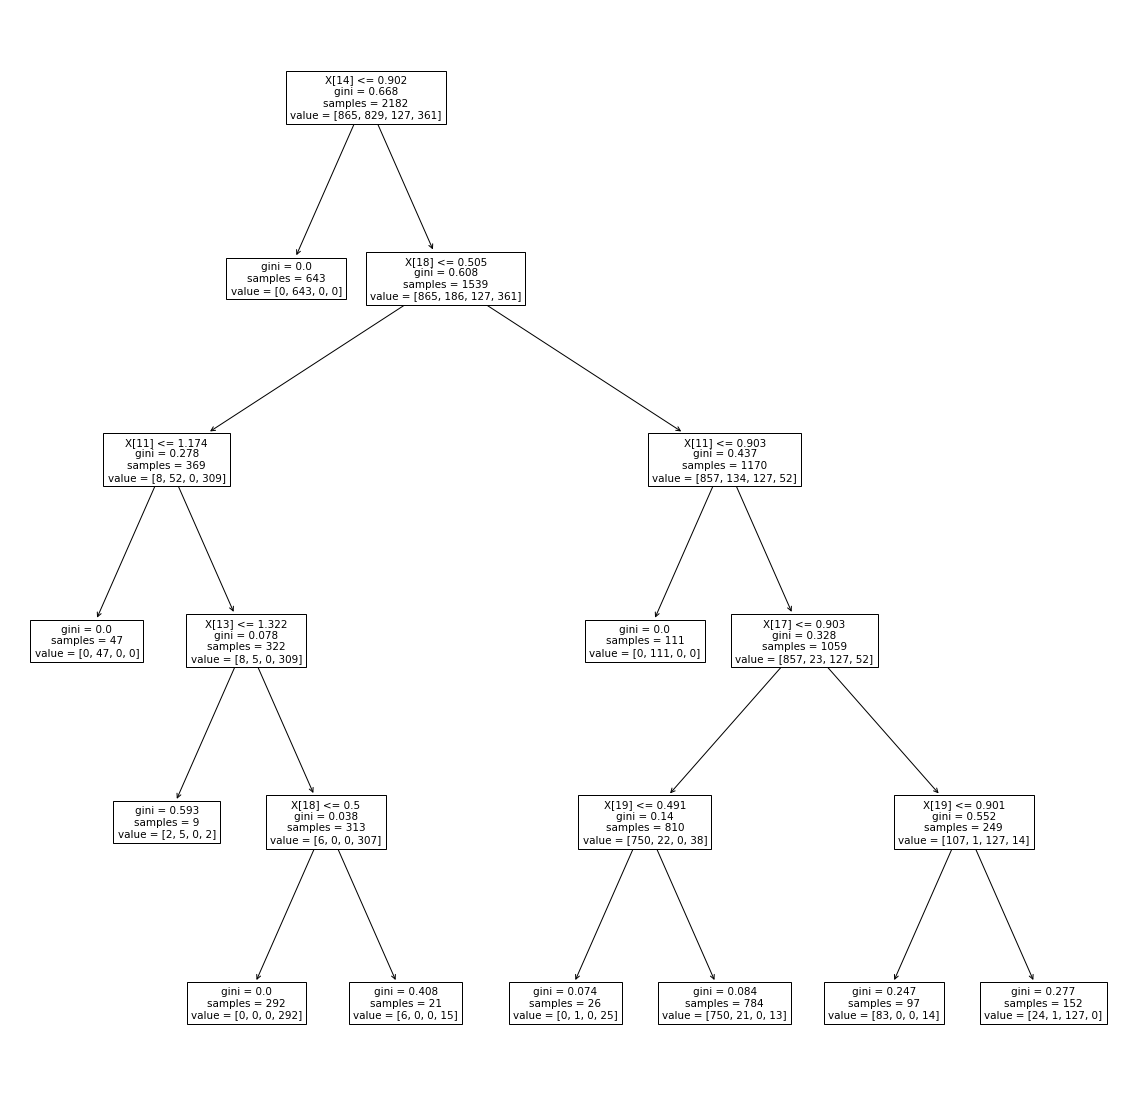

In [37]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(M)

In [38]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[1298,    2,   26,   14],
       [  43, 1223,    2,    0],
       [   1,    0,  199,    0],
       [  39,    7,    0,  419]])